# Attempt: ABC SMC applied on Lotka Volterra
**Note:**  
This is a purely ABC based file, so does not need the JAX compiled version of PINTS.

## The Lotka Volterra Model

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

### Example Trajectories

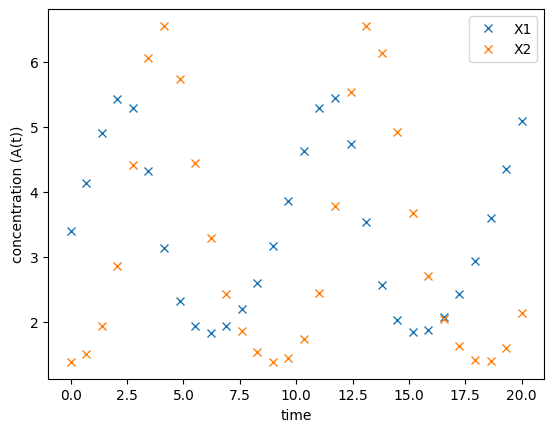

In [2]:
# np.random.seed(1)

# Load the LV model
model = toy.LotkaVolterraModel()

# Example of a toy data with suggested parameter values
times = np.linspace(0, 20,30)
params = np.array([0.5,0.15,1,.3])
values = model.simulate(params, times)

plt.plot(times, values[:,0], 'x', label = 'X1')
plt.plot(times, values[:,1], 'x', label = 'X2')

plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))'),
plt.show()

### Fit ABC SMC  
Here we use the sum of squares error(SSE) for the distance function to reject/accept.  
Set the thresholds. We accept a parameter value if the $SSE<10$ for the first intermediate distribution, $SSE<7.5$ for the second one and $SSE<5$ for the last.

In [4]:
np.random.seed(8)
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.SumOfSquaresError(problem)
# cov = np.diag([1/12,1/120,1/6,1/120])
log_prior = pints.UniformLogPrior([0,.1,0,.25], [1,.2,2,.35])
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)

# set threshold schedule
abc.sampler().set_threshold_schedule(np.array([10,7.5,5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(200)

# set target number of samples
abc.set_n_samples(1200)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

/var/folders/3z/d020c1ln2rbdn3rrr_x9nwxh0000gn/T/ipykernel_25625/875981682.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior([0,.1,0,.25], [1,.2,2,.35])


Running...
Using ABC-SMC
Running in sequential mode.
Starting t=0, with threshold=10.0
Iter. Eval. Acceptance rate Time m:s
1     153    0.00653594771    0:00.3
2     614    0.00325732899    0:01.1
3     1211   0.00247729149    0:01.9
20    12191  0.00164055451    0:16.6
40    20454  0.00195560771    0:27.7
60    31392  0.00191131498    0:42.3
80    44773  0.00178679115    1:00.2
100   56996  0.00175450909    1:17.6
120   71107  0.00168759756    1:35.5
140   82934  0.00168808932    1:50.2
160   94082  0.00170064412    2:04.3
180   105995  0.00169819331    2:19.5
Starting t=1, with threshold=7.5
200   114424  0.00174788506    2:30.3
220   114698  0.00191808052    2:30.7
240   114978  0.00208735584    2:31.1
260   115220  0.00225655268    2:31.4
280   115428  0.00242575458    2:31.7
300   115572  0.00259578445    2:31.9
320   115791  0.00276359993    2:32.2
340   116018  0.00293057974    2:32.6
360   116277  0.00309605511    2:32.9
380   116541  0.00326065505    2:33.3
Starting t=2, with

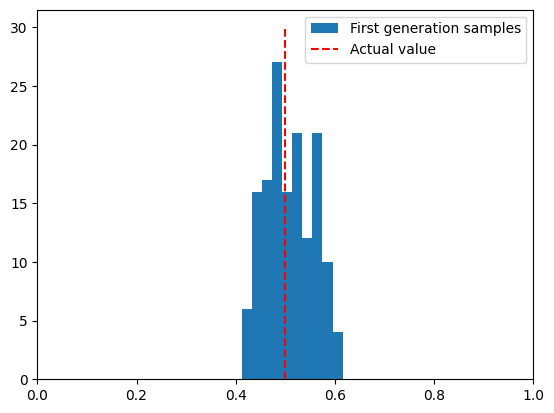

In [6]:
plt.hist([x[0] for x in samples[0:150]], label='First generation samples')
plt.xlim(0, 1)
plt.vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=30, label='Actual value', color='red')
plt.legend()
plt.show()

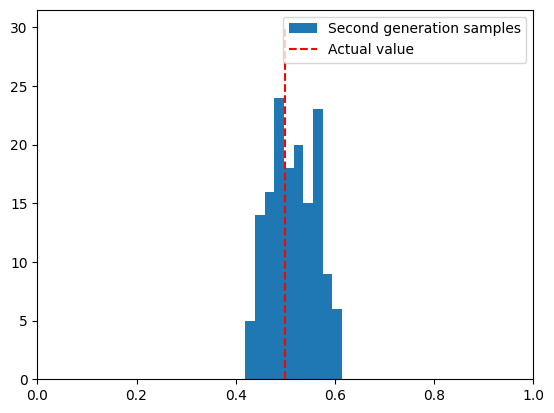

In [7]:
plt.hist([x[0] for x in samples[150:300]], label='Second generation samples')
plt.xlim(0, 1)
plt.vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=30, label='Actual value', color='red')
plt.legend()
plt.show()

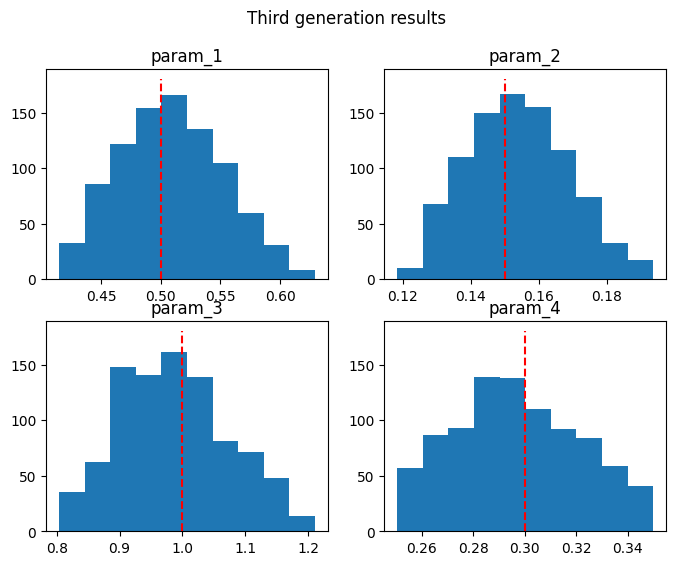

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples[300:]])
axs[0,0].set_title('param_1')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=180, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples[300:]])
axs[0,1].set_title('param_2')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=180, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples[300:]])
axs[1,0].set_title('param_3')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=180, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples[300:]])
axs[1,1].set_title('param_4')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=180, label='Actual value', color='red')

plt.suptitle('Third generation results')
plt.show()

### Appendix  
Results for 500 iterations with thresholds = [20,15,10]. Result for the last parameter not desirable.

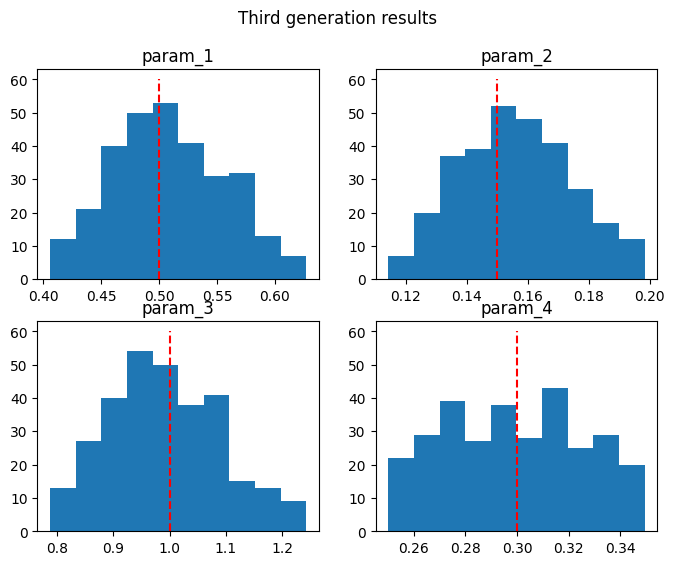

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0,0].hist([x[0] for x in samples[200:]])
axs[0,0].set_title('param_1')
axs[0,0].vlines(x=model.suggested_parameters()[0], linestyles='dashed', ymin=0, ymax=60, label='Actual value', color='red')

axs[0,1].hist([x[1] for x in samples[200:]])
axs[0,1].set_title('param_2')
axs[0,1].vlines(x=model.suggested_parameters()[1], linestyles='dashed', ymin=0, ymax=60, label='Actual value', color='red')

axs[1,0].hist([x[2] for x in samples[200:]])
axs[1,0].set_title('param_3')
axs[1,0].vlines(x=model.suggested_parameters()[2], linestyles='dashed', ymin=0, ymax=60, label='Actual value', color='red')

axs[1,1].hist([x[3] for x in samples[200:]])
axs[1,1].set_title('param_4')
axs[1,1].vlines(x=model.suggested_parameters()[3], linestyles='dashed', ymin=0, ymax=60, label='Actual value', color='red')

plt.suptitle('Third generation results')
plt.show()

## Lotka Volterra with Noise